In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import galsim

In [12]:
db_fname = "db files/baseline_v3.3_10yrs.db"

In [13]:
# open a connection to the database file; this doesn't read any data yet
con = sqlite3.connect(db_fname)

In [14]:
# create a 'cursor' that can scan through tables in the database
cur = con.cursor()

In [15]:
# get the names of all tables in the database
print(f"tables in {db_fname}:")
for table in cur.execute("SELECT * FROM sqlite_master where type='table'"):
    print(f"\t{table[1]}")

tables in /Users/msredden/Documents/DESC/DifferentialCR/db files/baseline_v3.3_10yrs.db:
	observations
	info


In [16]:
# use the `table_info` sql directive to discover
# 1. what columns are in the `observations` table, and
# 2. what data types they have
cur.execute("PRAGMA table_info(observations);").fetchall()

[(0, 'observationId', 'INTEGER', 0, None, 0),
 (1, 'fieldRA', 'REAL', 0, None, 0),
 (2, 'fieldDec', 'REAL', 0, None, 0),
 (3, 'observationStartMJD', 'REAL', 0, None, 0),
 (4, 'flush_by_mjd', 'REAL', 0, None, 0),
 (5, 'visitExposureTime', 'REAL', 0, None, 0),
 (6, 'filter', 'TEXT', 0, None, 0),
 (7, 'rotSkyPos', 'REAL', 0, None, 0),
 (8, 'rotSkyPos_desired', 'REAL', 0, None, 0),
 (9, 'numExposures', 'INTEGER', 0, None, 0),
 (10, 'airmass', 'REAL', 0, None, 0),
 (11, 'seeingFwhm500', 'REAL', 0, None, 0),
 (12, 'seeingFwhmEff', 'REAL', 0, None, 0),
 (13, 'seeingFwhmGeom', 'REAL', 0, None, 0),
 (14, 'skyBrightness', 'REAL', 0, None, 0),
 (15, 'night', 'INTEGER', 0, None, 0),
 (16, 'slewTime', 'REAL', 0, None, 0),
 (17, 'visitTime', 'REAL', 0, None, 0),
 (18, 'slewDistance', 'REAL', 0, None, 0),
 (19, 'fiveSigmaDepth', 'REAL', 0, None, 0),
 (20, 'altitude', 'REAL', 0, None, 0),
 (21, 'azimuth', 'REAL', 0, None, 0),
 (22, 'paraAngle', 'REAL', 0, None, 0),
 (23, 'cloud', 'REAL', 0, None, 0),


In [7]:
# run the query from Erin;
# this will select the airmass of observations in the g-band
# for the wide survey
res = cur.execute("""
    select
        airmass
    from
        observations
    where
        target = '' and filter = 'g'
""")

In [8]:
data = np.array(res.fetchall())

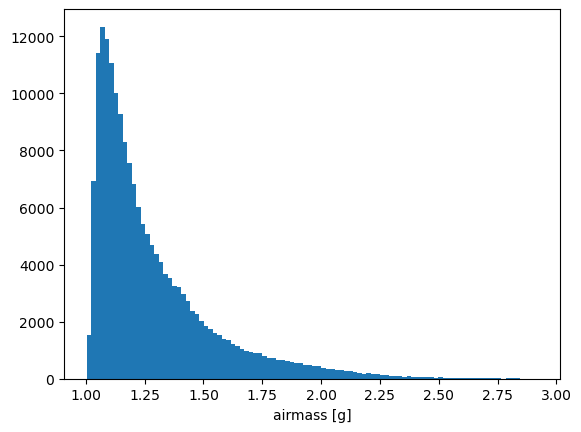

In [9]:
fig, ax = plt.subplots(1, 1)

ax.hist(data, bins=100)

ax.set_xlabel("airmass [g]")

plt.show()